In [1]:
# Dependencies
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
from pandas import DataFrame
from pandas import Series
import tweepy

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Save path to movies data file in a variable
Nbr_data_file = "Resources/TheNumbersGross.csv"

# Use Pandas to read data
gross_data_df = pd.read_csv(Nbr_data_file)
gross_data_df.head()

,Franchise,Release_Date,movie_title,Domestic_Gross,Worldwide_Gross
0,Star Trek,7-Dec-79,Star Trek: The Motion Picture,82258456,139000000
1,Star Trek,4-Jun-82,Star Trek II: The Wrath of Khan,78912963,95800000
2,Star Trek,1-Jun-84,Star Trek III: The Search for Spock,76471046,87000000
3,Star Trek,26-Nov-86,Star Trek IV: The Voyage Home,109713132,133000000
4,Star Trek,9-Jun-89,Star Trek V: The Final Frontier,52210049,70200000


In [3]:
# Save path to movies data file in a variable
data_file = "Resources/movie_data.csv"

# Use Pandas to read data from IMDB
movie_df = pd.read_csv(data_file)
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,936662225.0,Documentary,...,NaN,NaN,NaN,NaN,306000000.0,2015.0,12.0,7.1,NaN,0


In [4]:
# Clean the data frame to remove the "Â" value in the movie title
%timeit movie_df.movie_title.apply(lambda x: x.replace('Â',''))

movie_df.head()

1.95 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,936662225.0,Documentary,...,NaN,NaN,NaN,NaN,306000000.0,2015.0,12.0,7.1,NaN,0


In [5]:
# remove rows where any of the columns are set to NaN
movie_df = movie_df.dropna(how='any')
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [7]:
# Extract the Star Wars Movie information
starwars_df = reduced_movie_df[reduced_movie_df['movie_title'].str.contains("Star Wars")] 
starwars_df

starwars_df.head(15)

,movie_title,budget,gross,title_year
236,Star Wars: Episode III - Revenge of the Sith,113000000.0,380262555.0,2005.0
237,Star Wars: Episode II - Attack of the Clones,115000000.0,310675583.0,2002.0
240,Star Wars: Episode I - The Phantom Menace,115000000.0,474544677.0,1999.0
1536,Star Wars: Episode VI - Return of the Jedi,32500000.0,309125409.0,1983.0
2051,Star Wars: Episode V - The Empire Strikes Back,18000000.0,290158751.0,1980.0
3024,Star Wars: Episode IV - A New Hope(Star Wars),11000000.0,460935665.0,1977.0


In [6]:
# Extract movie name, release date, budget and gross values
reduced_movie_df = movie_df.loc[:, ["movie_title", "budget", "gross","title_year"]]
reduced_movie_df

reduced_movie_df.head()

,movie_title,budget,gross,title_year
0,Avatar,237000000.0,760505847.0,2009.0
1,Pirates of the Caribbean: At World's End,300000000.0,309404152.0,2007.0
2,Spectre,245000000.0,200074175.0,2015.0
3,The Dark Knight Rises,250000000.0,448130642.0,2012.0
5,John Carter,263700000.0,73058679.0,2012.0


In [8]:
starwars_df['budget'] = starwars_df['budget'].astype(float).map("${:,.2f}".format)
starwars_df['gross'] = starwars_df['gross'].astype(float).map("${:,.2f}".format)
starwars_df['title_year'] = starwars_df['title_year'].astype(int)

starwars_df.head(10)

C:\Users\dms40pj\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dms40pj\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dms40pj\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,movie_title,budget,gross,title_year
236,Star Wars: Episode III - Revenge of the Sith,"$113,000,000.00","$380,262,555.00",2005
237,Star Wars: Episode II - Attack of the Clones,"$115,000,000.00","$310,675,583.00",2002
240,Star Wars: Episode I - The Phantom Menace,"$115,000,000.00","$474,544,677.00",1999
1536,Star Wars: Episode VI - Return of the Jedi,"$32,500,000.00","$309,125,409.00",1983
2051,Star Wars: Episode V - The Empire Strikes Back,"$18,000,000.00","$290,158,751.00",1980
3024,Star Wars: Episode IV - A New Hope(Star Wars),"$11,000,000.00","$460,935,665.00",1977


In [ ]:
# Extract the Star Wars Movie information
startrek_df = reduced_movie_df[reduced_movie_df['movie_title'].str.contains("Star Trek")] 
startrek_df

startrek_df.head(15)

In [9]:
# Extract the Star Wars Movie information
starwars_gross_df = gross_data_df[gross_data_df['movie_title'].str.contains("Star Wars")] 
starwars_gross_df

starwars_gross_df.head(15)

,Franchise,Release_Date,movie_title,Domestic_Gross,Worldwide_Gross
13,Star Wars,25-May-77,Star Wars Ep. IV: A New Hope(Star Wars),460998007,786598007
14,Star Wars,20-May-80,Star Wars Ep. V: The Empire Strikes Back,290271960,534171960
15,Star Wars,25-May-83,Star Wars Ep. VI: Return of the Jedi,309205079,572705079
16,Star Wars,19-May-99,Star Wars Ep. I: The Phantom Menace,474544677,1027044677
17,Star Wars,16-May-02,Star Wars Ep. II: Attack of the Clones,310676740,656695615
18,Star Wars,19-May-05,Star Wars Ep. III: Revenge of the Sith,380270577,848998877
19,Star Wars,16-Dec-15,Star Wars Ep. VII: The Force Awakens,936662225,2058601220
20,Star Wars,14-Dec-16,Rogue One: A Star Wars Story(Star Wars Rogue One),532177324,1050988488
21,Star Wars,13-Dec-17,Star Wars Ep. VIII: The Last Jedi,620181382,1317178532
22,Star Wars,23-May-18,Solo: A Star Wars Story,213745535,385307085


In [10]:
# Sum the worldwide gross for all Starwars films
Sum_World_Gross = starwars_gross_df.groupby('Franchise')['Worldwide_Gross'].sum()
Sum_World_Gross

print(Sum_World_Gross)

Franchise
Star Wars    9238289540
Name: Worldwide_Gross, dtype: int64


In [11]:
# Sum the worldwide gross for all Starwars films
Sum_Domestic_Gross = starwars_gross_df.groupby('Franchise')['Domestic_Gross'].sum()
Sum_Domestic_Gross

print(Sum_Domestic_Gross)

Franchise
Star Wars    4528733506
Name: Domestic_Gross, dtype: int64


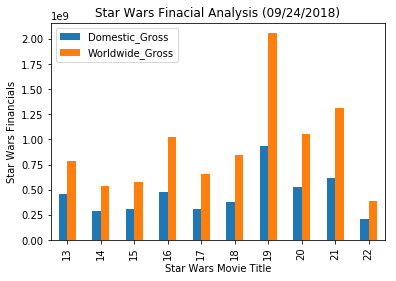

<Figure size 432x288 with 0 Axes>

In [44]:
starwars_chart = starwars_gross_df.plot(kind='bar')
x_axis = np.arange(len(starwars_gross_df['movie_title']))

plt.title(f"Star Wars Financial Analysis ({now})")
plt.xlabel("Gross Dollar Values")

starwars_chart.set_xlabel("Gross Dollar Values")
starwars_chart.set_ylabel("Movie Title")

# Get the current date for display
now = datetime.now()
now = now.strftime("%m/%d/%Y")

# Give our chart some labels and a tile
plt.title(f"Star Wars Finacial Analysis ({now})")
plt.xlabel("Star Wars Movie Title")
plt.ylabel("Star Wars Financials")

plt.show()
plt.tight_layout()

# Save Figure
plt.savefig("Fig2.png")

In [45]:
starwars_gross_df['Worldwide_Gross'] = starwars_df['Worldwide_Gross'].astype(float).map("${:,.2f}".format)
starwars_gross_df['Domestic_Gross'] = starwars_df['Domestic_Gross'].astype(float).map("${:,.2f}".format)

starwars_gross_df.head(10)

KeyError: 'Worldwide_Gross'

In [ ]:
startrek_df['budget'] = startrek_df['budget'].astype(float).map("${:,.2f}".format)
startrek_df['gross'] = startrek_df['gross'].astype(float).map("${:,.2f}".format)
startrek_df['title_year'] = startrek_df['title_year'].astype(int)

starwars_df.head(10)